## 비지도 학습

### 1. 환경준비

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN

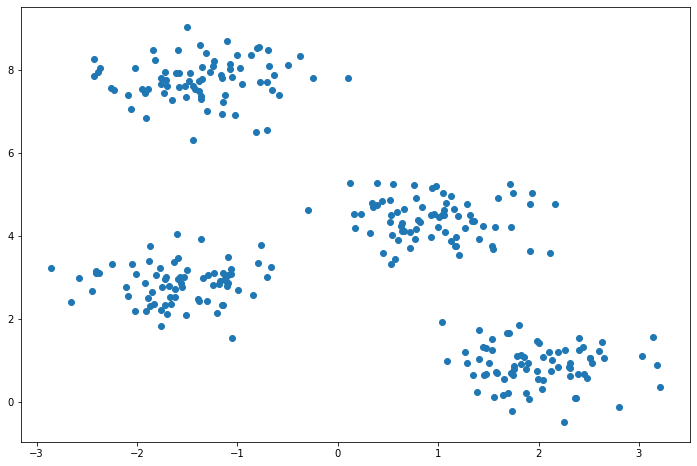

In [3]:
# Sample Data 생성
x, y  = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name='shape')

plt.figure(figsize=(12, 8))
plt.scatter(x['x1'], x['x2'])
plt.show()

### 2. k-means

#### (1) k-means 모델 만들기

In [6]:
# k-means 모델 생성, 예측
model = KMeans(n_clusters=2, algorithm='auto')
model.fit(x)
pred = model.predict(x)

In [7]:
# feature, pred, y 비교
pred = pd.DataFrame(pred, columns = ['predicted'])
result = pd.concat([x, pred, y], axis = 1)
result.head()

,x1,x2,predicted,shape
0,1.039925,1.929910,1,1
1,-1.386091,7.480596,0,3
2,1.125389,4.966980,1,0
3,-1.056890,7.818339,0,3
4,1.402004,1.726729,1,1


In [8]:
# center들의 중심점
model.cluster_centers_

array([[-1.35241261,  7.76731726],
       [ 0.45801672,  2.70596152]])

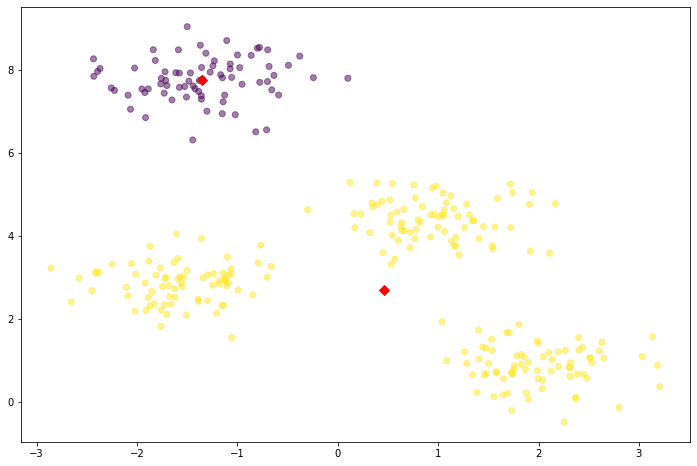

In [9]:
# 시각화

# kmeans 모델로부터 클러스터의 평균 값들을 가져오기
centers = pd.DataFrame(model.cluster_centers_, columns=['x1', 'x2'])

# scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(result['x1'], result['x2'], c=result['predicted'], alpha=0.5)
plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
plt.show()

In [10]:
# k 값에 따라 모델을 생성하고 시각화하는 함수

def k_means_plot(x, y, k) : 
    model = KMeans(n_clusters= k, algorithm='auto')
    model.fit(x)
    pred = model.predict(x)

    pred = pd.DataFrame(pred, columns = ['predicted'])
    result = pd.concat([x, pred, y], axis = 1)

    # k means 모델로 부터 클러스터의 평균 값들을 가져올 수 있습니다.
    centers = pd.DataFrame(model.cluster_centers_, columns=['x1','x2'])

    # scatter plot
    plt.figure(figsize = (12,8))
    plt.scatter(result['x1'],result['x2'],c=result['predicted'],alpha=0.5)
    plt.scatter(centers['x1'], centers['x2'], s=50,marker='D',c='r')
    plt.show()

#### (2) 적절한 k값 찾기

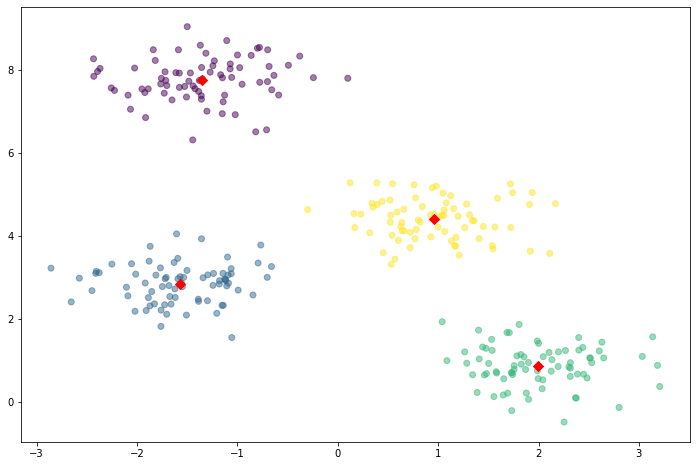

In [11]:
# 적절한 k값 찾기
# k 값을 1~8까지 조절해 봅시다.
k_means_plot(x, y, k = 4)

In [12]:
# Inertia 값으로 적정 k값 찾기

# 거리의 합
model.inertia_

1121.4338468225149

In [13]:
kvalues = range(1,10)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


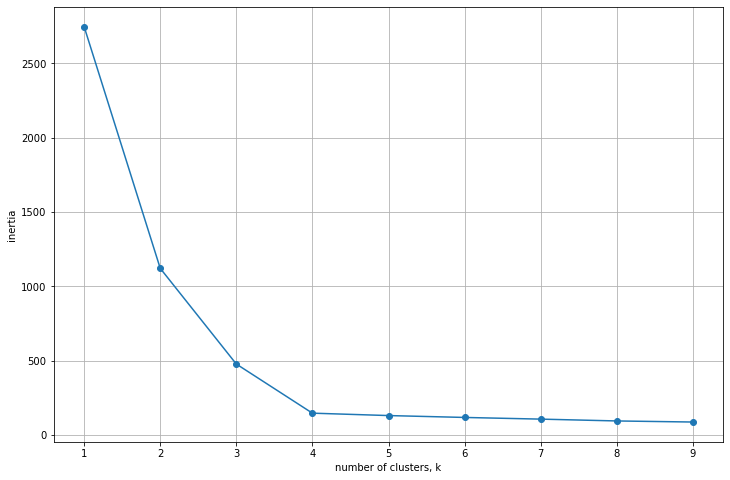

In [14]:
plt.figure(figsize = (12,8))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

- Elbow Method를 이용해 적절한 k값이 2 ~ 3임을 알 수 있음.

#### (3) K-means의 한계

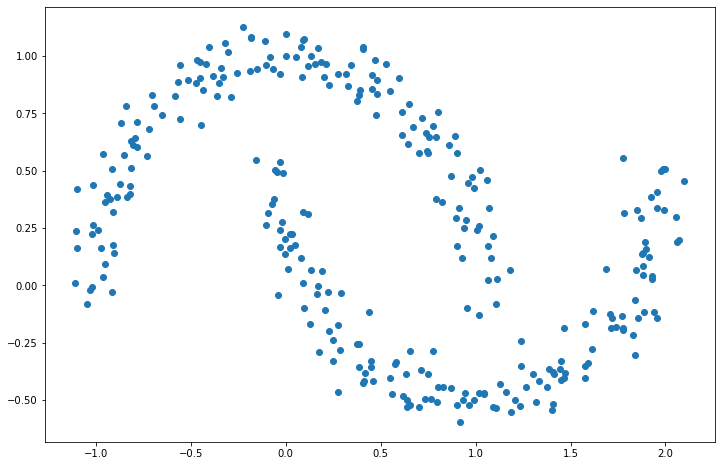

In [15]:
# sample data 2
x, y = make_moons(n_samples = 300, noise = .08, random_state=2)
x = pd.DataFrame(x, columns = ['x1', 'x2'])
y = pd.Series(y, name = 'shape')

plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'])
plt.show()

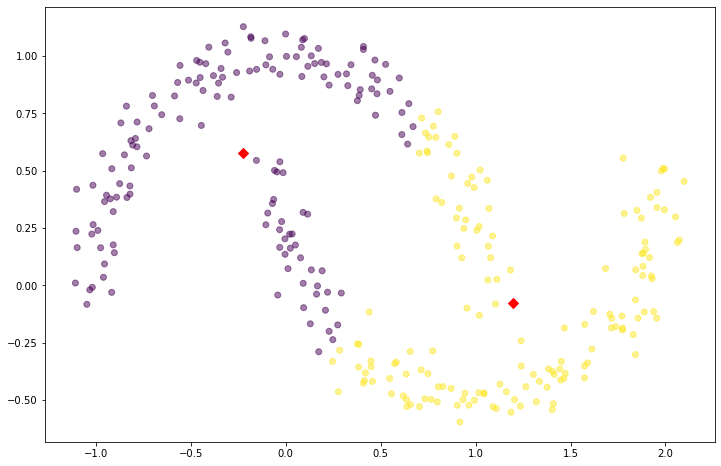

In [16]:
# k means 모델 만들기 (k = 2)
k_means_plot(x, y, k = 2)

In [17]:
# inertia를 이용
kvalues = range(1,15)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


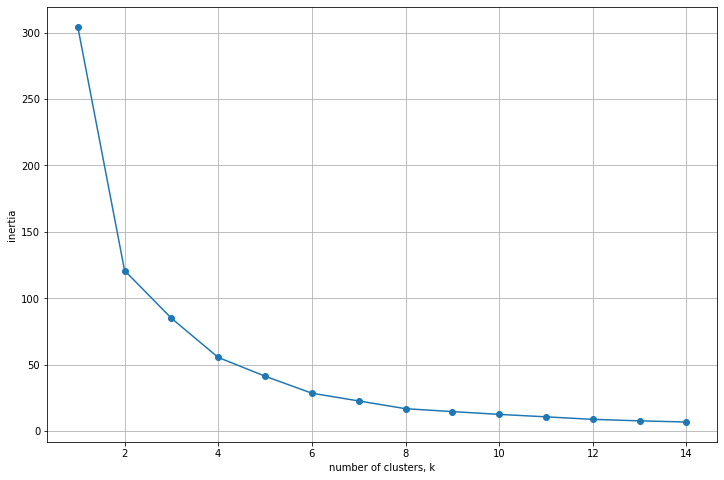

In [18]:
plt.figure(figsize = (12,8))
plt.plot(kvalues, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.grid()
plt.show()

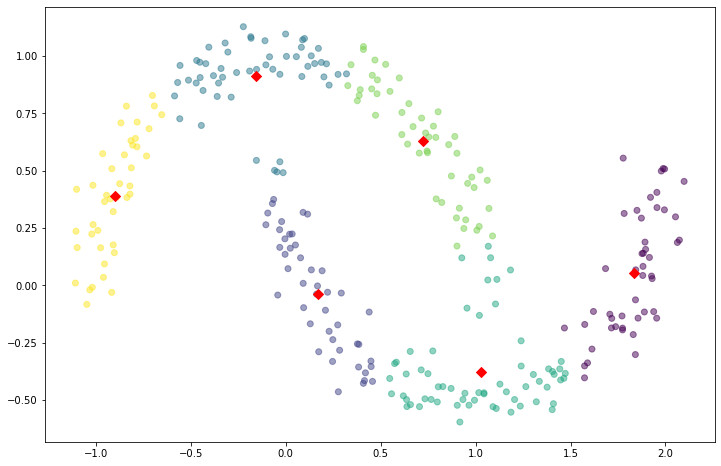

In [19]:
k_means_plot(x, y, k = 6)

- 우리가 기대하는대로 모델이 생성되지 않음.

### 3. DBSCAN

#### (1) DBSCAN 모델 만들기

In [20]:
model = DBSCAN(eps=0.1, min_samples=3)
model.fit(x)

DBSCAN(eps=0.1, min_samples=3)

In [21]:
# fitting 후에 모델의 labels_ 값이 찾아낸 군집 종류
clusters = model.labels_

In [22]:
# 군집 번호 중 -1은 이상치를 의미
clusters

array([ 0,  1,  2,  7,  3,  1,  4,  4,  2,  0,  9,  5,  3,  2,  5,  0,  0,
        6,  6,  0,  3,  4,  2, -1,  2,  0,  2,  2,  7,  8,  5,  2, -1,  2,
        2,  2,  2,  9,  0,  5, 10,  0,  3,  4,  9,  2,  5,  5,  0,  2,  2,
        8,  5,  2, 10,  4, -1,  2,  2,  2,  0, -1,  2,  0,  2, 11,  2, 10,
        5,  2,  0,  2,  2,  0,  4,  2, -1,  2,  6,  2,  0,  4,  8,  5,  2,
       11,  3,  2,  5,  0,  7,  2,  2,  0,  4,  2,  5, 11,  0, -1,  5, 11,
        8,  5, 10,  7,  2,  2,  0,  2,  5,  0, 12,  2,  4,  0,  0,  2,  2,
       12,  6,  4,  0,  0,  2,  5,  2,  2,  5,  8,  6,  8,  2,  2,  0,  2,
        4,  3,  9,  0,  2,  2,  9,  2,  0,  3, -1,  0,  6,  5,  7,  0,  7,
       -1,  2,  2,  4,  6,  5,  7,  7,  5,  4,  2,  8,  2, 11,  8,  9,  2,
        5,  2,  9,  1,  0,  7,  0,  0,  2,  9,  7,  0,  8,  6,  7,  5,  9,
        2,  3,  0,  2,  2,  0, 12,  3,  0,  2,  2,  2,  6,  0,  3,  2,  2,
        6,  4,  0,  2,  2,  2,  2,  2,  2,  6,  5,  0,  4,  2,  2,  7, -1,
       -1,  0,  8,  2,  6

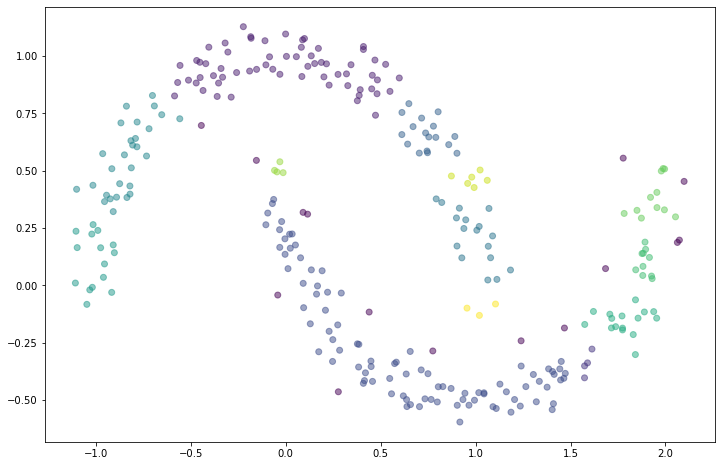

In [23]:
plt.figure(figsize = (12,8))
plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
plt.show()

In [24]:
# eps를 적용해 모델 생성
def dbscan_plot(x, y, eps) :
    model = DBSCAN(eps=eps, min_samples=3)
    model.fit(x)
    clusters = model.labels_
    plt.figure(figsize = (12,8))
    plt.scatter(x['x1'], x['x2'], c=clusters, alpha=0.5)
    plt.show()

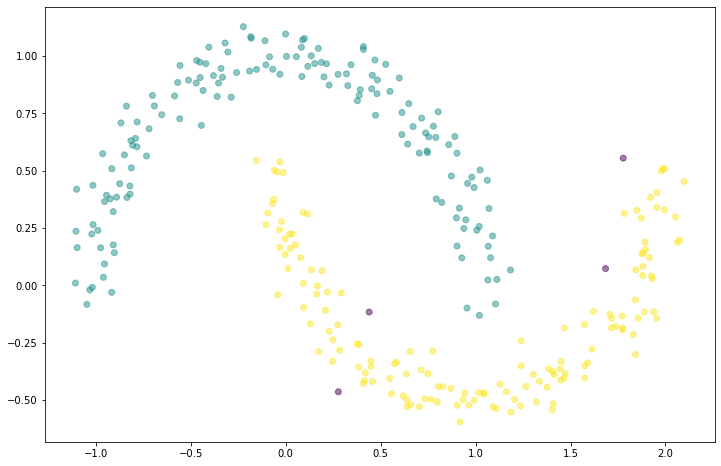

In [25]:
dbscan_plot(x, y, 0.13)

#### (2) 적절한 eps값 찾기

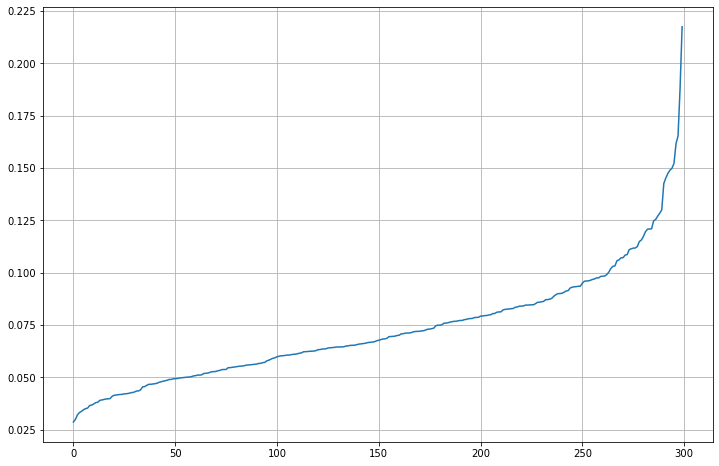

In [26]:
# 각점과 근처 5개 점과의 평균 거리
knnDist = NearestNeighbors().fit(x)
distances, _ = knnDist.kneighbors(x)
dist = np.mean(distances[:,1:], axis = 1)
dist = np.sort(dist)

plt.figure(figsize = (12,8))
plt.plot(dist)
plt.grid()
plt.show()

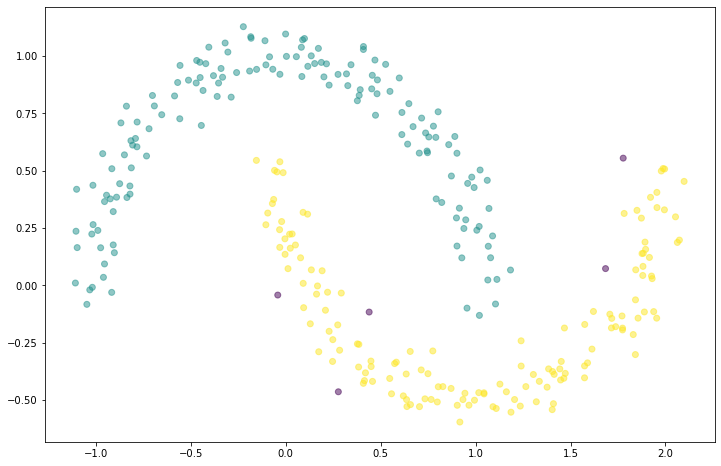

In [27]:
epsilon = 0.125
dbscan_plot(x,y, eps = epsilon)

### 4. 이동통신 고객 분석

#### (1) 환경 준비와 데이터 로딩

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [29]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_churn_simple.csv"
mobile = pd.read_csv(data_path)

mobile.loc[mobile['CHURN'] == 'LEAVE', 'CHURN'] = 1
mobile.loc[mobile['CHURN'] == 'STAY', 'CHURN'] = 0

In [30]:
# 무작위로 1000개 샘플링
mobile_s = mobile.sample(1000, random_state=2021)

In [31]:
mobile_x = mobile_s.drop(['CHURN'],axis = 1)
mobile_y = mobile_s.loc[:, "CHURN"]
col_x = list(mobile_x)

In [32]:
minmax = MinMaxScaler()
mobile_x = minmax.fit_transform(mobile_x)
mobile_x = pd.DataFrame(mobile_x, columns = col_x)
mobile_x.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
0,0.230233,0.751724,0.719101,0.323684,0.267880,0.827586,0.071429
1,0.892978,0.279310,0.235955,0.043392,0.673602,0.103448,0.357143
2,0.301204,0.872414,0.325843,0.591912,0.265280,0.000000,0.071429
3,0.410814,0.596552,0.000000,0.670582,0.156047,0.379310,1.000000
4,0.386106,0.165517,0.629213,0.701109,0.231469,0.137931,0.000000


#### (2) k값 찾기

In [33]:
ks = range(1,50)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(mobile_x)
    inertias.append(model.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


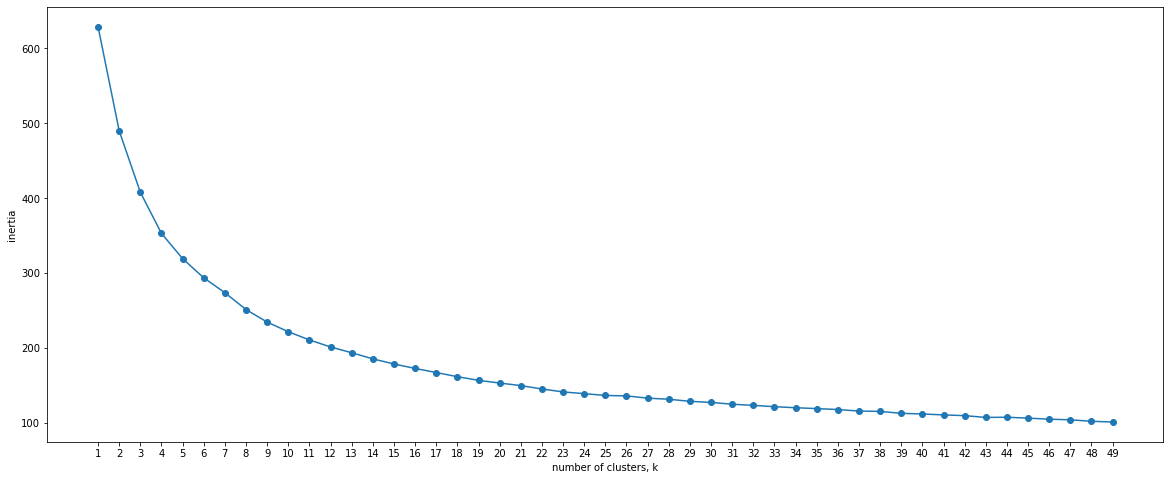

In [34]:
plt.figure(figsize=(20,8))
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### (3) 모델링

In [35]:
model = KMeans(n_clusters=5)
model.fit(mobile_x)
pred = model.predict(mobile_x)
pred = pd.DataFrame(pred, columns = ['predict'])

#### (4) 결과 살펴보기

In [36]:
mobile_y.reset_index(inplace=True, drop=True)
result = pd.concat([mobile_x, mobile_y, pred], axis =1)

In [37]:
result.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN,predict
0,0.230233,0.751724,0.719101,0.323684,0.267880,0.827586,0.071429,0,0
1,0.892978,0.279310,0.235955,0.043392,0.673602,0.103448,0.357143,1,3
2,0.301204,0.872414,0.325843,0.591912,0.265280,0.000000,0.071429,0,0
3,0.410814,0.596552,0.000000,0.670582,0.156047,0.379310,1.000000,0,2
4,0.386106,0.165517,0.629213,0.701109,0.231469,0.137931,0.000000,0,4


In [38]:
result.CHURN = result.CHURN.astype('int')

In [39]:
# 클러스터 별 고객 이탈율
result.groupby('predict')['CHURN'].mean()

predict
0    0.494949
1    0.323333
2    0.626728
3    0.507109
4    0.445087
Name: CHURN, dtype: float64

In [40]:
# 전체 평균
result['CHURN'].value_counts() / result.shape[0]

0    0.534
1    0.466
Name: CHURN, dtype: float64